In [1]:
import src
from src import *

In [2]:
with open('src/processed_data.pkl', 'rb') as f:
    op, high, low, close, volume, returns, risk_free_rate = pickle.load(f)

2017-02-08 start test to 2018-02-07

In [3]:
train_returns = returns.iloc[:-252]
test_returns = returns.iloc[-252:]
test_risk_free_rate = risk_free_rate.iloc[-252:]
test_returns

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-02-08,0.005825,-0.002438,0.022057,0.003870,-0.000661,0.008159,-0.011490,-0.004236,0.010126,0.015216,...,0.005634,0.002407,-0.015708,-0.001917,0.040199,-0.004670,0.001503,-0.008161,-0.015296,-0.000357
2017-02-09,0.010757,0.027147,0.012822,0.002874,0.005274,0.006349,0.003296,0.013339,0.002666,-0.012598,...,0.007632,-0.004993,0.004409,0.022256,-0.013680,0.013105,0.011942,0.003834,0.022973,0.000000
2017-02-10,-0.002182,0.003235,-0.004743,-0.002268,-0.006927,-0.005251,0.004690,0.005286,0.003515,0.000261,...,0.009835,0.001207,0.008275,-0.003761,0.005495,0.005445,0.009011,-0.002299,0.009686,-0.004119
2017-02-13,0.003172,0.020457,-0.010170,0.008817,0.001488,-0.007597,0.011168,0.008383,0.006823,0.018000,...,0.007251,0.025529,0.005800,0.007677,-0.005495,0.008320,0.001616,0.003573,0.011637,-0.010643
2017-02-14,-0.002577,-0.017877,0.012119,0.012896,0.005110,0.003751,0.009900,0.011820,-0.000595,-0.001027,...,0.002985,-0.012853,-0.002171,0.015180,0.029853,-0.013135,0.006877,-0.004853,0.022433,-0.002179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.008205,-0.008133,0.002561,0.002088,0.036056,-0.003820,0.000322,-0.001495,-0.001904,-0.002506,...,-0.001358,-0.007285,0.020072,-0.001316,-0.041274,0.035082,-0.007237,0.008382,0.017430,0.014106
2018-02-02,-0.021933,-0.033594,-0.029065,-0.044360,-0.010108,-0.033488,-0.007912,-0.022436,-0.018936,-0.028105,...,0.038917,-0.025852,-0.052316,-0.011094,-0.034797,0.010897,-0.016206,-0.018900,-0.015212,-0.013454
2018-02-05,-0.043457,-0.045954,-0.036377,-0.025302,-0.050393,-0.043855,-0.049171,-0.032847,-0.027832,-0.042525,...,-0.015014,-0.053352,-0.058586,-0.025634,-0.007935,-0.040459,-0.034849,-0.020967,-0.047268,-0.039179


In [4]:
predictor = ReturnPredictor(train_returns)
optimizer = PortfolioOptimizer(train_returns)

def equal_weight_strategy(train_ret):
    opt = PortfolioOptimizer(train_ret)
    return opt.equal_weight()

def min_var_strategy(train_ret):
    opt = PortfolioOptimizer(train_ret)
    return opt.minimum_variance(max_position=0.05)

In [5]:
backtester = WalkForwardBacktest(
    train_returns=train_returns,
    test_returns=test_returns,
    # test_prices=test_prices,
    rf_rate_test=test_risk_free_rate,
    rebalance_freq='D'  # Weekly
)

In [6]:
# results = {}

# # Run Equal Weight
# results['Equal Weight'] = backtester.run_backtest(
#     strategy_name='Equal Weight',
#     get_weights_func=equal_weight_strategy,
#     transaction_cost_bps=10.0
# )

# # Run Minimum Variance
# results['Minimum Variance'] = backtester.run_backtest(
#     strategy_name='Minimum Variance',
#     get_weights_func=min_var_strategy,
#     transaction_cost_bps=10.0
# )

In [7]:
evaluator = PerformanceEvaluator(test_risk_free_rate)

comparison_df = evaluator.compare_strategies(results)
print("\nPerformance Comparison:")
print(comparison_df.to_string())

# ============================================================
# STEP 5: Visualize Results
# ============================================================
print("\n5. Generating Visualizations")
print("-" * 60)

fig = evaluator.plot_results(results, figsize=(15, 10))
plt.show()
    

NameError: name 'results' is not defined

Predicted Values

In [1]:
from src import *

In [2]:
with open('src/processed_data.pkl', 'rb') as f:
    op, high, low, close, volume, returns, risk_free_rate = pickle.load(f)

train_returns = returns.iloc[:-252]
test_returns = returns.iloc[-252:]
test_risk_free_rate = risk_free_rate.iloc[-252:]
test_returns

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-02-08,0.005825,-0.002438,0.022057,0.003870,-0.000661,0.008159,-0.011490,-0.004236,0.010126,0.015216,...,0.005634,0.002407,-0.015708,-0.001917,0.040199,-0.004670,0.001503,-0.008161,-0.015296,-0.000357
2017-02-09,0.010757,0.027147,0.012822,0.002874,0.005274,0.006349,0.003296,0.013339,0.002666,-0.012598,...,0.007632,-0.004993,0.004409,0.022256,-0.013680,0.013105,0.011942,0.003834,0.022973,0.000000
2017-02-10,-0.002182,0.003235,-0.004743,-0.002268,-0.006927,-0.005251,0.004690,0.005286,0.003515,0.000261,...,0.009835,0.001207,0.008275,-0.003761,0.005495,0.005445,0.009011,-0.002299,0.009686,-0.004119
2017-02-13,0.003172,0.020457,-0.010170,0.008817,0.001488,-0.007597,0.011168,0.008383,0.006823,0.018000,...,0.007251,0.025529,0.005800,0.007677,-0.005495,0.008320,0.001616,0.003573,0.011637,-0.010643
2017-02-14,-0.002577,-0.017877,0.012119,0.012896,0.005110,0.003751,0.009900,0.011820,-0.000595,-0.001027,...,0.002985,-0.012853,-0.002171,0.015180,0.029853,-0.013135,0.006877,-0.004853,0.022433,-0.002179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.008205,-0.008133,0.002561,0.002088,0.036056,-0.003820,0.000322,-0.001495,-0.001904,-0.002506,...,-0.001358,-0.007285,0.020072,-0.001316,-0.041274,0.035082,-0.007237,0.008382,0.017430,0.014106
2018-02-02,-0.021933,-0.033594,-0.029065,-0.044360,-0.010108,-0.033488,-0.007912,-0.022436,-0.018936,-0.028105,...,0.038917,-0.025852,-0.052316,-0.011094,-0.034797,0.010897,-0.016206,-0.018900,-0.015212,-0.013454
2018-02-05,-0.043457,-0.045954,-0.036377,-0.025302,-0.050393,-0.043855,-0.049171,-0.032847,-0.027832,-0.042525,...,-0.015014,-0.053352,-0.058586,-0.025634,-0.007935,-0.040459,-0.034849,-0.020967,-0.047268,-0.039179


Predicting the returns

In [3]:
predictor = MLReturnPredictor(model_type='ridge', alpha=.1)
X_train, y_train = predictor.create_training_dataset(os.listdir('src/data')[:os.listdir('src/data').index('2017-02-08.pkl')-65],
                                                      train_returns.iloc[:-65]) #65 for purge
predictor.train(X_train, y_train)
predicted = predictor.predict_all_test_returns(os.listdir('src/data')[os.listdir('src/data').index('2017-02-08.pkl'):])

Creating training dataset from 871 files...
✓ Dataset created: X=(409370, 54), y=(409370,)
Training ridge model...
✓ Training R²: 0.0058
  Prediction spread: 0.1243%
Predicting returns for 252 dates...
✓ Predictions complete: (252, 470)


This is during the test period then to do walk forward can use this code

In [ ]:
testing_dates = test_returns.index.strftime('%Y-%m-%d').map(lambda x: x+".pkl").values

preds = []

for test_date in testing_dates[:5]:
    X_train, y_train = predictor.create_training_dataset(os.listdir('src/data')[:os.listdir('src/data').index(test_date)-65],
                                                        train_returns) #65 for purge
    predictor.train(X_train, y_train)
    predicted = predictor.predict_all_test_returns([test_date])
    preds.append(predicted)

pd.concat(preds)

Creating training dataset from 871 files...
✓ Dataset created: X=(409370, 54), y=(409370,)
Training ridge model...
✓ Training R²: 0.0058
  Prediction spread: 0.1243%
<class 'str'>
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 872 files...
✓ Dataset created: X=(409840, 54), y=(409840,)
Training ridge model...
✓ Training R²: 0.0058
  Prediction spread: 0.1240%
<class 'str'>
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 873 files...
✓ Dataset created: X=(410310, 54), y=(410310,)
Training ridge model...
✓ Training R²: 0.0058
  Prediction spread: 0.1238%
<class 'str'>
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 874 files...
✓ Dataset created: X=(410780, 54), y=(410780,)
Training ridge model...
✓ Training R²: 0.0059
  Prediction spread: 0.1255%
<class 'str'>
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating tra

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2017-02-08,-0.000390,-0.001618,0.000662,-0.001462,0.000373,0.001351,-0.000780,-0.000524,-0.000800,-0.000079,...,-0.001333,-0.000099,-0.000591,0.000310,-0.000764,-0.000208,-0.000356,0.001275,-0.000807,-0.000294
2017-02-09,-0.000199,0.000993,0.000884,-0.000152,-0.000398,-0.000683,0.000020,-0.000469,-0.001661,-0.000876,...,-0.000607,-0.001577,0.000282,-0.000525,-0.000291,-0.000391,-0.001089,0.000619,-0.000089,-0.001170
2017-02-10,-0.000054,-0.000366,0.000754,-0.000832,-0.001527,-0.000443,-0.000571,-0.000707,-0.001103,-0.000668,...,-0.000413,-0.001372,-0.000056,-0.001920,-0.000978,-0.000503,-0.000749,0.000046,-0.000753,-0.000500
2017-02-13,-0.001616,-0.000427,0.000753,-0.000388,-0.000739,-0.001199,-0.001127,-0.000291,-0.000429,0.000133,...,-0.000748,0.000131,-0.000094,-0.001086,-0.000420,-0.000282,-0.000380,-0.001419,0.000364,-0.000167
2017-02-14,-0.001163,-0.001227,0.000138,-0.001885,-0.000115,-0.000363,-0.001084,-0.000746,-0.001362,-0.001641,...,-0.001254,-0.000475,0.000284,-0.000520,-0.002409,-0.001421,-0.000669,-0.000959,-0.001486,-0.000166


The one below takes very long btw

Chooses optimal portfolio based on predicted returns

In [ ]:
from joblib import Parallel, delayed
from tqdm.auto import tqdm
import pickle

tickers = predicted.columns.tolist()

def compute_weights_for_date(date):
    predicted_returns = pd.concat([returns.loc[:date].iloc[:-1], predicted.loc[[date]]])
    opt = PortfolioOptimizer(predicted_returns).minimum_variance(max_position=0.05)
    return pd.Series(opt, index=tickers)

weights_list = Parallel(n_jobs=-1)(
    delayed(compute_weights_for_date)(d) for d in tqdm(predicted.index[:5], desc="weights")
)

weights = pd.concat(weights_list, axis=1).T
weights.index.name = 'date'
weights.index = predicted.index[:5]

with open('weights.pkl', 'wb') as f:
    pickle.dump(weights, f)


weights: 100%|██████████| 5/5 [00:00<00:00, 3983.19it/s]


Preparing backtest


In [4]:
backtester = WalkForwardBacktest(
    train_returns=train_returns,
    test_returns=test_returns,
    # test_prices=test_prices,
    rf_rate_test=test_risk_free_rate,
    rebalance_freq='D'  # Weekly
)

running backtest

In [5]:
results = {}

with open('weights.pkl', 'rb') as f:
    weights = pickle.load(f)

# Run Equal Weight
results['ML w fees'] = backtester.run_backtest_preloaded_weights(
    strategy_name='ML',
    preloaded_weights=weights,
    transaction_cost_bps=10.0
)

results['ML no fees'] = backtester.run_backtest_preloaded_weights(
    strategy_name='ML',
    preloaded_weights=weights,
    transaction_cost_bps=0
)


weights = weights.iloc[[0]]

for col in weights.columns:
    weights[col].values[:] = 1/470

results['Base'] = backtester.run_backtest_preloaded_weights(
    strategy_name='ML',
    preloaded_weights=weights,
    transaction_cost_bps=10.0
)


Running backtest: ML
Rebalancing frequency: D
Preloaded weights shape: (252, 470)
Backtest complete. Final value: $1.0946
Initial value: $1.0049

Running backtest: ML
Rebalancing frequency: D
Preloaded weights shape: (252, 470)
Backtest complete. Final value: $1.1106
Initial value: $1.0049

Running backtest: ML
Rebalancing frequency: D
Preloaded weights shape: (1, 470)
Backtest complete. Final value: $1.1142
Initial value: $1.0025


Evaluation


Performance Comparison:
           Total Return Annualized Return Annualized Volatility Sharpe Ratio Sortino Ratio Maximum Drawdown Calmar Ratio Win Rate Avg Turnover per Rebalance Total Turnover
ML w fees         9.46%             9.46%                 6.91%        1.126         0.965           -6.68%        1.416   57.77%                      5.80%          14.56
ML no fees       11.06%            11.06%                 6.91%        1.337         1.149           -6.65%        1.664   58.17%                      5.80%          14.56
Base             11.42%            11.42%                 8.55%        1.162         1.033           -7.80%        1.464   55.78%                      0.00%           0.00

5. Generating Visualizations
------------------------------------------------------------


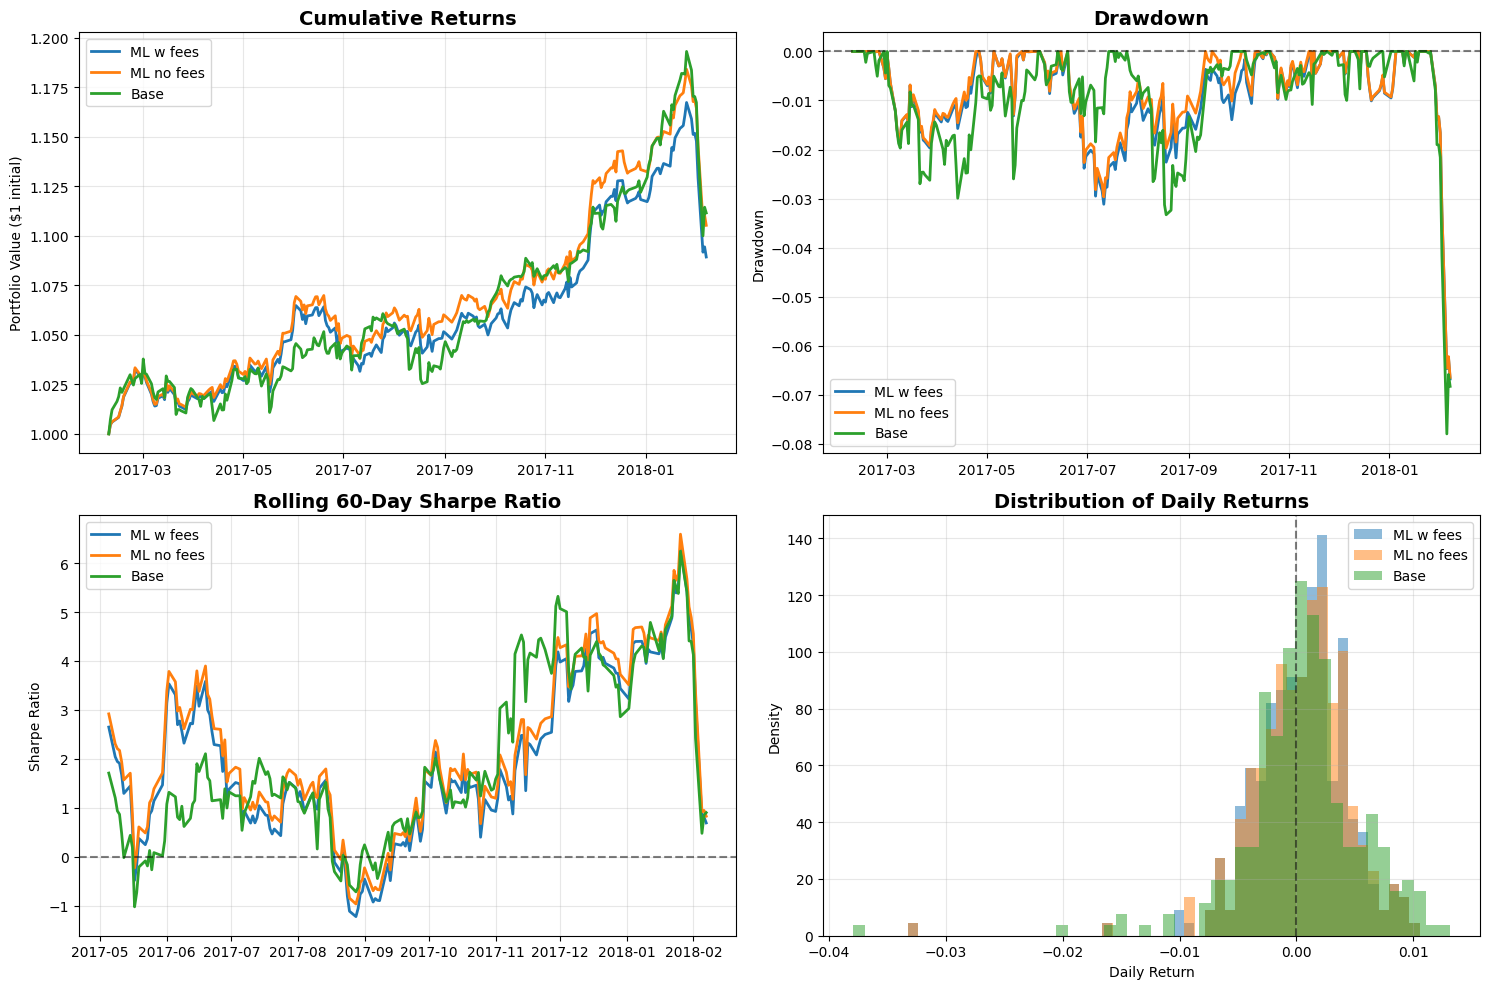

In [6]:
evaluator = PerformanceEvaluator(test_risk_free_rate)

comparison_df = evaluator.compare_strategies(results)
print("\nPerformance Comparison:")
print(comparison_df.to_string())

# ============================================================
# STEP 5: Visualize Results
# ============================================================
print("\n5. Generating Visualizations")
print("-" * 60)

fig = evaluator.plot_results(results, figsize=(15, 10))
plt.show()